In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter("ignore")

### Problem 2

####  \begin{equation}\tau = 5000\;\sigma_T \;\frac{\omega^4}{(\omega^2-\omega_0^2)^2+(\omega_0^2/100)^2}\end{equation}
#### where $\omega$ varies from $10^{-4}\omega_0$ to $10^2 \omega_0$

In [2]:
def tau(omega):
    return 5000*sigma_T*(omega**4)/((omega**2-omega_0**2)**2+(omega_0**2/100)**2)

In [3]:
sigma_T = 6.652*1e-25
omega_0 = 1  # Taking omega_0 to be 1.
omega = np.logspace(-4,2,1000)*omega_0

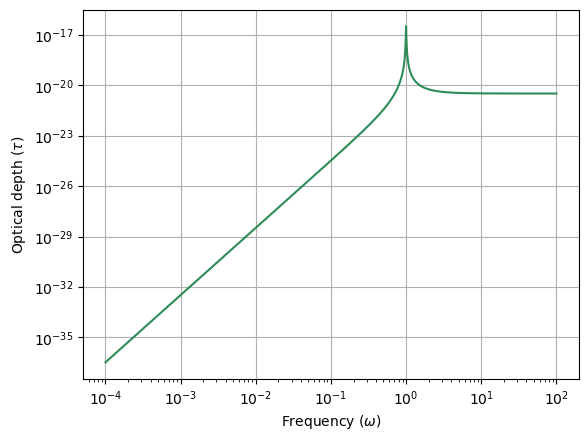

In [4]:
plt.plot(omega,tau(omega),color = "seagreen")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\omega)$")
plt.ylabel("Optical depth "+r"$(\tau)$")
plt.grid()

### Problem 3: 
#### For $n_e = n_i = 10^5/m^3 = 0.1/cm^3$, $\nu \in [10^2 \text{ MHz}, 10^{13}\text{ MHz}]$ and $T = 1000\;K, 10^5\;K$
#### \begin{equation} \frac{dW}{dV\;d\nu\;dt} = 6.8\times 10^{-38}\;Z^2 \;T^{-\frac{1}{2}}\;n_e n_i e^{-h\nu/kT}\bar{g}_{ff}\end{equation}
#### \begin{equation} \Rightarrow \frac{dW}{dV\;d\nu\;dt\;Z^2\;\bar{g}_{ff}} = 6.8\times 10^{-38}\;T^{-\frac{1}{2}}\;n_e n_i e^{-h\nu/kT}\end{equation}
We will plot the LHS. (Keeping $Z^2\;\text{and}\;\bar{g}_{ff}$ constant) 

In [5]:
def emission(T,nu):
    return 6.8e-38*T**(-1/2)*n_e*n_i*np.exp(-h*nu/(k*T))

#### $\nu$ can also be written as $\nu \in [10^8 \text{ Hz}, 10^{19}\text{ Hz}]$ 

In [6]:
nu = np.logspace(8,19,1000) # Converting nu from MHz into Hz
h = 6.626176e-27  # In CGS(erg-sec) 
k = 1.3807e-16   # In CGS (erg/K)
n_e, n_i = 0.1,0.1

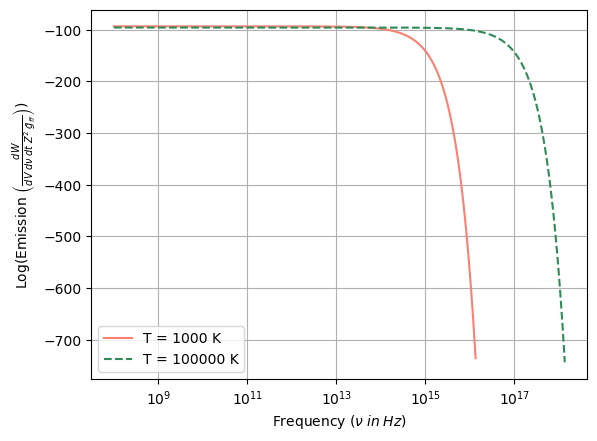

In [7]:
T1 = 1000
plt.plot(nu, np.log(emission(T1,nu)),color = "salmon",label = "T = "+str(T1)+" K")
T2 = 10**5
plt.plot(nu, np.log(emission(T2,nu)),color = "seagreen",linestyle = "dashed",label = "T = "+str(T2)+" K")
plt.legend()
#plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\nu \;in\; Hz)$")
plt.ylabel("Log(Emission "+r"$\left(\frac{dW}{dV\;d\nu\;dt\;Z^2\;\bar{g}_{ff}}\right))$")
plt.grid()

### Problem 4:
#### \begin{equation}\alpha_\nu^{ff} =3.7\times 10^8\; T^{-\frac{1}{2}}Z^2 n_en_i\nu^{-3}(1-e^{-h\nu/kT})\bar{g}_{ff}\end{equation}
#### where $n_e = n_i = 50/cm^3$, 
#### T = (i) $1000$ K and (ii) $10^5$ K,
#### L = (A) $10^2$ km = $10^7$ cm and (B) $10^{10}$ km = $10^{15}$ cm and
#### $\nu$  =  $10^8$ Hz to $10^{15}$ Hz
#### \begin{equation}\tau = \int_0^L \alpha_\nu^{ff}  \;dr = \alpha_\nu^{ff}\;L\end{equation}
because $\alpha_\nu^{ff}$ is $r$ independent here.
#### Here, I will plot $\tau/(Z^2\;\bar{g}_{ff})$ keeping $Z^2\; \text{and}\;\bar{g}_{ff}$ constant.

In [8]:
def Tau(T,nu,L):
    return 3.7e8*T**(-1/2)*n_e*n_i*nu**(-3)*(1-np.exp(-h*nu/(k*T)))*L

In [9]:
nu = np.logspace(8,15,1000)
n_e,n_i = 50,50
T = np.array([10**3,10**5])

#### For L = $10^7$ cm

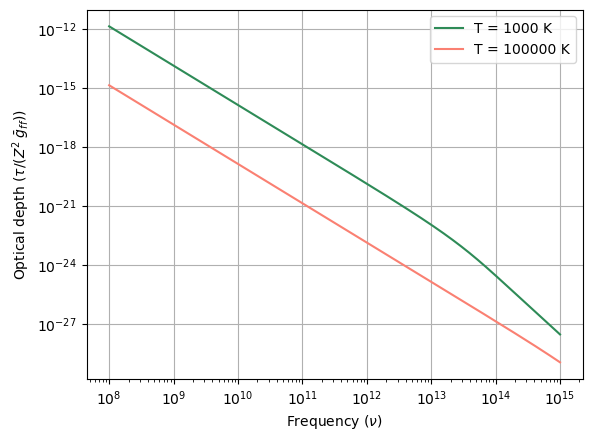

In [10]:
L = 10**7
plt.plot(nu,Tau(T[0],nu,L),label = "T = "+str(T[0])+" K",color = "seagreen")
plt.plot(nu,Tau(T[1],nu,L),label = "T = "+str(T[1])+" K",color = "salmon")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\nu)$")
plt.ylabel("Optical depth "+r"$(\tau/(Z^2\;\bar{g}_{ff}))$")
plt.grid()

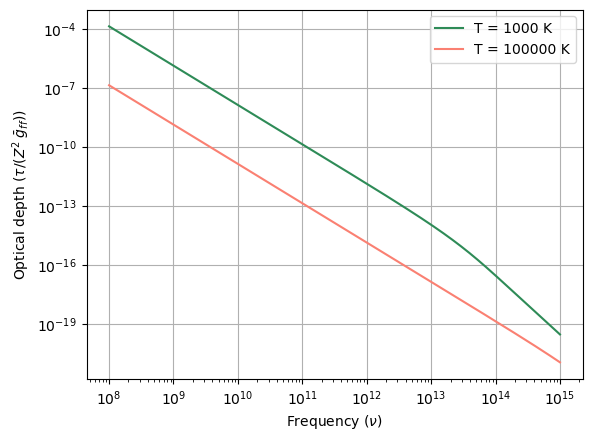

In [11]:
L = 10**15
plt.plot(nu,Tau(T[0],nu,L),label = "T = "+str(T[0])+" K",color = "seagreen")
plt.plot(nu,Tau(T[1],nu,L),label = "T = "+str(T[1])+" K",color = "salmon")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\nu)$")
plt.ylabel("Optical depth "+r"($\tau/(Z^2\;\bar{g}_{ff})$)")
plt.grid()

In [12]:
slope1 = np.polyfit(np.log(nu),np.log(Tau(T[1],nu,L)),1)
slope1

array([-2.00477907, 21.17430659])

### Problem 7:

#### \begin{equation}\alpha_\nu = 8.38345\times 10^{-3}\left(1.24852\times10^{19}\right)^{\frac{p}{2}}\;(B\sin\alpha)^{\frac{p+2}{2}}\;\Gamma\left(\frac{3p+2}{12}\right)\Gamma\left(\frac{3p+22}{12}\right)\;\nu^{-\frac{p+4}{2}}\end{equation}
#### where $n_e = n_i = 50/\text{cm}^3$
#### L = (A) $10^2$ km = $10^7$ cm and (B) $10^{10}$ km = $10^{15}$ cm
#### $N (E) = E^{−2.5}$, $N (E) = E^{−4}$
#### $\nu$ = $10\text{ MHz to }10\text{ THz}$
#### \begin{equation}\tau = \int_0^L \alpha_\nu  \;dr = \alpha_\nu\;L\end{equation}
because $\alpha_\nu^{ff}$ is $r$ independent here.
#### Here, I will plot $\tau/((B\sin\alpha)^{\frac{p+2}{2}})$ keeping $(B\sin\alpha)^{\frac{p+2}{2}}$ constant.

#### I am not using values of $B$ in plots because it will only shift the values on y-axis by a constant term. 

In [13]:
def Tau2(p,nu,L):
    return 8.38345e-3*(1.24852e19)**(p/2)*(math.gamma((3*p+2)/(12)))*(math.gamma((3*p+22)/(12)))*nu**(-(p+4)/2)*L

In [14]:
nu = np.logspace(7,13,1000)
n_e,n_i = 50,50
p = np.array([2.5,4])

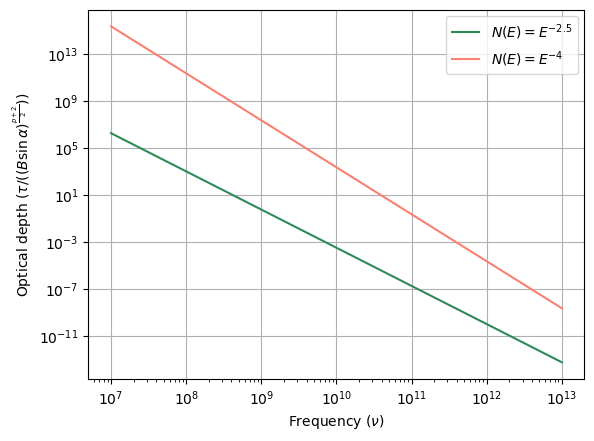

In [15]:
L = 10**7
plt.plot(nu,Tau2(p[0],nu,L),label = r"$N(E) = E^{-2.5}$",color = "seagreen")
plt.plot(nu,Tau2(p[1],nu,L),label = r"$N(E) = E^{-4}$",color = "salmon")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\nu)$")
plt.ylabel("Optical depth "+r"($\tau/((B\sin\alpha)^{\frac{p+2}{2}})$)")
plt.grid()

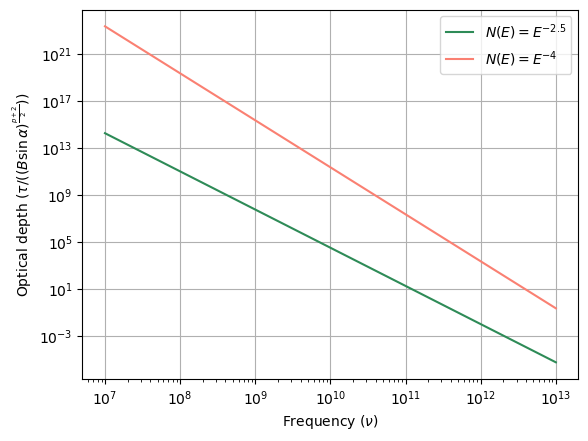

In [16]:
L = 10**15
plt.plot(nu,Tau2(p[0],nu,L),label = r"$N(E) = E^{-2.5}$",color = "seagreen")
plt.plot(nu,Tau2(p[1],nu,L),label = r"$N(E) = E^{-4}$",color = "salmon")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Frequency "+r"$(\nu)$")
plt.ylabel("Optical depth "+r"($\tau/((B\sin\alpha)^{\frac{p+2}{2}})$)")
plt.grid()

In [17]:
slope2 = np.polyfit(np.log(nu),np.log(Tau2(p[0],nu,L)),1)
slope2

array([-3.25      , 85.13712006])

In [18]:
slope3 = np.polyfit(np.log(nu),np.log(Tau2(p[1],nu,L)),1)
slope3

array([ -4.        , 118.16936372])

### Comparison of $\tau$ in problem 7 and 4:

#### $\boxed{\text{The Optical depth }\tau\text{ varies as }\nu^{-2}\text{ in problem 4 but it varies as }\nu^{-3.25}\text{ and }\nu^{-4}\text{ for p = 2.5 and p = 4 respectively.}}$